# **Homework 8**
## Mark Hendricks - Discussion

# 1. LTCM

## 1.1 
### Describe LTCM’s investment strategy with regard to the following aspects:
- Securities traded
- Trading frequency
- Skewness (Do they seek many small wins or a few big hits?)
- Forecasting (What is behind their selection of trades?)

#### Solution: 
- LTCM traded across a wide range of securities. They are heavily involved in fixed income and credit, and they also have sizeable positions in equities. In all these asset classes, they trade a large number of securities, across global markets.

- LTCM's trading frequencies vary given that they house a wide range of strategies. Their largest bucket, the convergence trades, typically take weeks and months to converge. Overall, they are something of a medium-term frequency. Largely, they are not trying to arbitrage intraday movements, nor are they making long-term directional bets.

- LTCM largely is trying to pick up small premia in the convergence trades, which limits the upside of any individual trade, and leaves it substantial downside, given all the leverage. Of course, aggregating all their trades together can lead to positive skewness if they are properly diversified. But we would expect that their typical trade has a small positive mean with substantial negative skewness.

- For most their trades, LTCM is not making directional forecasts. Rather, they are trading spreads and pairs, forecasting relative convergence rather than absolute levels. In this sense, they do not rely on sophisticated forecasting models of the overall market but rather rely on models to forecast the size and speed of relative convergence in particular markets.

## 1.2
### What are LTCM’s biggest advantages over its competitors?

#### Solution:
Several advantages.
- Efficient financing. LTCM got very favorable terms on all financing—sometimes even zero haircut! Typically had small, if any, outlay.</li>
- Fund size. Have market power even in the large market of institutional wholesale.</li>
- Liquidity. LTCM has in place many mechanisms to ensure liquidity.</li>
- Long-term horizon. In financing and assessing trades, LTCM takes a relatively long-term view.
- Hedged. LTCM avoids taking too much default risk or explicit directional bets.

Then again, LTCM went bust in Aug. 1998, so maybe these advantages were not as strong as it
seemed!

## 1.3
### The case discusses four types of funding risk facing LTCM:
- collateral haircuts
- repo maturity
- equity redemption
- loan access
The case discusses specific ways in which LTCM manages each of these risks. Briefly discuss
them.

#### Solution:
The case discusses steps LTCM took to manage four types of funding risks.
- Collateral haircuts. For most trades, LTCM obtains 100% financing on a fully collateralized
basis. Furthermore, LTCM stress tests the haircuts across its asset classes.
- Repo. LTCM goes against the norm by entering into relatively long-maturity repo. While much of it is overnight, LTCM uses contracts that typically have maturity of 6-12 months. Furthermore, LTCM manages their aggregate repo maturity.
- Equity redemption. The firm is highly levered, so equity funding risk is especially important. LTCM restricts redemptions of equity year by year. The restriction is particularly strong in that unredeemed money is re-locked.
They also spread the redemption windows across the year to ensure there is never a possibility of immediate withdrawal of a large portion of equity.
- For debt funding, LTCM negotiated a revolving loan that has no Material Adverse Change clause. Thus, the availability of debt funding is not so highly correlated with fund performance.

## 1.4
### LTCM is largely in the business of selling liquidity and volatility. Describe how LTCM accounts for liquidity risk in their quantitative measurements.

#### Solution:
LTCM attempts to account for liquidity risk quantitatively by adjusting security correlations. For short-term horizons, LTCM assumes positive correlation between all trade categories. Even if their net exposure to a strategy flips sides, they still assume positive correlation to the new net position.
Given the efforts of LTCM to hedge out obvious market risks, there are many strategies which would seem to have zero correlation. However, LTCM feels that liquidity concerns can cause the effective trading to be positively correlated.

## 1.5
### Is leverage risk currently a concern for LTCM?

#### Solution:
It would seem that leverage is not particularly dangerous at the moment. The fund’s volatility is relatively low, its VaR is relatively low, nor is it particularly high relative to the rest of the industry.
Moreover, the firm actively manages its funding risk which theoretically means it should be able to handle the natural risks of high leverage.
At the time of the case, the firm is trying to determine whether to further increase leverage. Subsequently, at the end of 1997 the fund returned about a third of its 7.5 billion equity capital to investors.
Of course, less than a year later, the fund blew up, but from the time of the case it’s hard to see the leverage risk.

## 1.6
### Many strategies of LTCM rely on converging spreads. LTCM feels that these are almost win/win situations because of the fact that if the spread converges, they make money. If it diverges, the trade becomes even more attractive, as convergence is still expected at a future date.

### What is the risk in these convergence trades?

#### Solution:
About a year after the time of the case, the fund loses most of its value due to non-converging trades. So clearly there is some risk!
Positions are subject to liquidity risk. If market liquidity dries up or the markets become segmented, the divergent spreads can persist for a long time. This indeed happens later to LTCM. The trades that get them in trouble ultimately pay off, but not before LTCM blows up.
LTCM believes it can exit these convergence trades if they become too unprofitable. However, a stop-loss order is not the same as a put option. If the price jumps discontinuously through the stop-loss, then it is ineffective. Or a market may be paralyzed/illiquid when trying to execute the stop-loss. A put option does not need to worry about price impact, whereas a stop-loss does. Finally, a stop-loss ensures that an investor sells as soon as a security price hits a worst-case scenario, ensuring unfavorable market timing.

# 2. LTCM Risk Decomposition

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.precision", 4)

import sys
sys.path.insert(0, '../cmds')
from portfolio import *

In [2]:
DATAPATH_ltcm = '../data/ltcm_exhibits_data.xlsx'
SHEET = 'Exhibit 2'
ltcm_raw = pd.read_excel(DATAPATH_ltcm,sheet_name=SHEET)
ltcm_raw.columns = ['date','AUM','Gross','Net','TRInet','drop']
ltcm_raw = ltcm_raw.set_index('date').drop(columns=['drop'])
ltcm_raw = ltcm_raw.loc[ltcm_raw.index.dropna()]
ltcm_raw.dropna(axis=0,how='all',inplace=True)
ltcm_raw.tail()

,AUM,Gross,Net,TRInet
date,,,,
1998-03-01 00:00:00,4.7,-0.003,-0.003,2.8
1998-04-01 00:00:00,4.9,0.027,0.019,2.85
1998-05-01 00:00:00,4.5,-0.067,-0.064,2.67
1998-06-01 00:00:00,4.1,-0.101,-0.101,2.4
1998-07-01 00:00:00,4.1,0.005,0,2.4


### Timing of LTCM Data

The Exhibit data is coded into Excel poorly. It is listed as monthly data, but Excel automatically converts that to the first day of the month. The data corresponds to the End-of-Month!

For instance, LTCM chose to return \$2.7bn of capital on Dec 31, 1997. The drop in AUM is coded to Dec 1, 1997 when the casewriters simply intended to code it to Dec 1997, meaning the end-of-december.

Similarly, LTCM saw large drawdowns in May and June 1998, but these are coded to be May 1 and June 1, when they should be coded as the end-of-month date.

Thus, we need to shift these dates to end-of-month. If we instead make the May 1 date correspond to April 30 returns, we will get incorrect correlations and regression results.

In [3]:
ltcm_raw.index = pd.to_datetime(ltcm_raw.index)

ltcm = ltcm_raw.resample('M').last()
ltcm.tail()

,AUM,Gross,Net,TRInet
date,,,,
1998-03-31,4.7,-0.003,-0.003,2.80
1998-04-30,4.9,0.027,0.019,2.85
1998-05-31,4.5,-0.067,-0.064,2.67
1998-06-30,4.1,-0.101,-0.101,2.40
1998-07-31,4.1,0.005,0.000,2.40


## Optional: Add in August 1998?

August 1998 is when LTCM was shocked with massive losses. These were so large that investors then pulled their money in September, to the point that a reorganization of LTCM was implemented in late September.

- The return for August 1998 was roughly -45\%
- And SPY was also down massively in that month.


Try setting `INCLUDE_AUGUST` to `True` to see how different the statistical results below are when this disaster month is included!

## Optional: Evaluate it through December 1997

- This corresponds closely to the time of the case, when they are deciding whether to return capital.
- You will see that the returns through that time are incredible, with hardly any losses.
- 1998 has some bad months before the crash in August.

In [4]:
INCLUDE_AUGUST98 = False
STOP_DEC97 = False

if INCLUDE_AUGUST98:
    DATE_JULY = pd.to_datetime('1998-07-31')
    DATE_AUGUST = pd.to_datetime('1998-08-31')
    LOSS = -1.85
    
    ltcm.loc[DATE_AUGUST,'Gross'] = LOSS/ltcm.loc[DATE_JULY,'AUM']
    # assuming that the netting of this loss is negligible given already down YTD
    ltcm.loc[DATE_AUGUST,'Net'] = LOSS/ltcm.loc[DATE_JULY,'AUM']
    
    ltcm.loc[DATE_AUGUST,'AUM'] = ltcm.loc[DATE_JULY,'AUM'] + LOSS
    ltcm.loc[DATE_AUGUST,'TRInet'] = ltcm.loc[DATE_JULY,'TRInet'] * (1+ltcm.loc[DATE_AUGUST,'Net'])
    display(ltcm.tail())

elif STOP_DEC97:
    ltcm = ltcm.loc[:'1997',:]

### Market Data

Get SPY and Risk-free data.

Align it to the LTCM data, and combine into a dataframe of returns

In [5]:
DATAPATH_GMO = '../data/gmo_analysis_data.xlsx'
SHEET = 'returns (total)'
mkt = pd.read_excel(DATAPATH_GMO,sheet_name=SHEET).set_index('Date')[['SPY']]
SHEET = 'risk-free rate'
mkt['RF'] = pd.read_excel(DATAPATH_GMO,sheet_name=SHEET).set_index('Date')[['US3M']]

rets = pd.concat([mkt[['SPY','RF']], ltcm[['Gross','Net']]], join='inner', axis=1)
rets.tail()

,SPY,RF,Gross,Net
1998-03-31,0.0488,0.0043,-0.003,-0.003
1998-04-30,0.0128,0.0042,0.027,0.019
1998-05-31,-0.0208,0.0042,-0.067,-0.064
1998-06-30,0.0426,0.0042,-0.101,-0.101
1998-07-31,-0.0135,0.0042,0.005,0.000


## 2.1 Summary Stats

The homework was not explicit in whether you should calculate these summary stats using excess returns or total returns. Given that it requires excess returns for 2.2-2.4, we convert to excess returns here.

In [6]:
retsx = rets.subtract(rets['RF'],axis=0).drop(columns=['RF'])
display(performanceMetrics(retsx,annualization=12))
display(tailMetrics(retsx))

,Mean,Vol,Sharpe,Min,Max
SPY,0.1738,0.1123,1.5479,-0.0562,0.0749
Gross,0.2421,0.1362,1.7769,-0.1053,0.1123
Net,0.1554,0.1118,1.3901,-0.1053,0.0803


,Skewness,Kurtosis,VaR (0.05),CVaR (0.05),Max Drawdown,Peak,Bottom,Recover,Duration (to Recover)
SPY,-0.4335,-0.3620,-0.0464,-0.0514,-0.0562,1997-07-31,1997-08-31,1997-12-31,153 days
Gross,-0.2877,1.5866,-0.0304,-0.0730,-0.1689,1998-04-30,1998-06-30,NaT,NaT
Net,-0.8102,2.9269,-0.0264,-0.0687,-0.1761,1997-12-31,1998-07-31,NaT,NaT


### The summary stats

The summary stats are great for the data in the exhibits, and even better if cut off at the end of 1997, at the time of the case.

- Sharpe is very high relative to what we usually see.
- Volatility is sized similarly to SPY, and minimum return is not too bad.

Still, note that 
- SPY does amazing during this period, 
- so LTCM's returns while fantastic, are not an outlier relative to SPY.
- In fact, if we include the 1998 data through July, the tail-risk statistics look worse for LTCM than for SPY.

If we include the August crash,
- All the performance looks bad relative to SPY, particularly the tail-risk.

The difference between Gross and Net is not too large.
- Obviously, the net returns are lower, but given how high LTCM returns are (especially through) 1997, the net returns still deliver a fantastic Sharpe and overall profile. Though one can note they are a bit lower than SPY.

## 2.2 Market Regression

In [7]:
get_ols_metrics(retsx['SPY'],retsx,annualization=12).style.format('{:,.2%}'.format)

,alpha,SPY,r-squared,Treynor Ratio,Info Ratio
SPY,-0.00%,100.00%,100.00%,17.38%,nan%
Gross,21.08%,17.98%,2.20%,134.60%,156.48%
Net,13.15%,13.71%,1.90%,113.31%,118.81%


### The regression stats make LTCM look even better.

While the univariate stats like Sharpe Ratio were not particularly impressive relative to SPY, the regression results show that LTCM has very little correlation to SPY! Thus, these large returns are
- nearly all alpha, not beta
- generating a massive Information Ratio

Thus, this investment looks extremely attractive as an addition to equity-oriented portfolios.

### Optional: 
If August 1998 is included, the regression picks up substantial SPY correlation, making all the stats worse.

## 2.3 Quadratic Regression

In [8]:
X = pd.concat([retsx[['SPY']],retsx[['SPY']]**2],join='inner',axis=1)
X.columns = ['SPY','SPY-squared']

table_quad = pd.DataFrame(index=retsx.columns, columns=['alpha']+list(X.columns)+['R-squared'])
for series in retsx.columns:
    mod = LinearRegression().fit(X,retsx[series])
    table_quad.loc[series,'alpha'] = mod.intercept_
    table_quad.loc[series,X.columns] = mod.coef_
    table_quad.loc[series,'R-squared'] = mod.score(X,retsx[series])

table_quad

,alpha,SPY,SPY-squared,R-squared
SPY,-0.0,1.0,-0.0,1.0
Gross,0.0202,0.2198,-2.5868,0.0285
Net,0.0129,0.1669,-1.9267,0.0243


### The Quadratic Regression
- does not add to the R-squared to a significant degree.
- Thus, quadratic movements of SPY are not significant in explaining LTCM variation
- To the degree it has quadratic exposure, it is negative. This indicates LTCM underperforms particularly large SPY movements (whether on the upside or downside).

### Optional
- With August 1998 included, the regression picks up massive negative exposure to the quadratic term, due to the severe underperformance of SPY's down month in August 1998. This alone raises the R-squared to a high level.

## 2.4 Asymmetric Regression

In [9]:
STRIKE = .03
X = retsx[['SPY']].copy()
X['UP'] = (retsx[['SPY']]-STRIKE).clip(0)
X['DOWN'] = (-STRIKE - retsx[['SPY']]).clip(0)
X.tail()

table_asymmetric = pd.DataFrame(index=retsx.columns, columns=['alpha']+list(X.columns)+['R-squared'])
for series in retsx.columns:
    mod = LinearRegression().fit(X,retsx[series])
    table_asymmetric.loc[series,'alpha'] = mod.intercept_
    table_asymmetric.loc[series,X.columns] = mod.coef_
    table_asymmetric.loc[series,'R-squared'] = mod.score(X,retsx[series])

table_asymmetric

,alpha,SPY,UP,DOWN,R-squared
SPY,-0.0,1.0,-0.0,-0.0,1.0
Gross,0.0145,0.6085,-1.0384,1.6325,0.0638
Net,0.0084,0.4666,-0.7821,1.2896,0.0555


### The Asymmetric regression
- again shows LTCM as having very little exposure to SPY, even with these nonlinear considerations. That is, the R-squared is still tiny.
- Though the coefficients are not significant, we can interpret the SPY UP coefficient as saying LTCM is underperforming large (positive) SPY returns. This is similar to what we learned from the quadratic regression.
- The SPY DOWN coefficient indicates LTCM overperforms large negative SPY movements. This differs from the Quadratic regression result, which could not distinguish asymmetry in the response to up and down movements.
- Still, the number of such UP and DOWN months is small, and the effect is statistically weak.

### Optional
But if we re-do this including the optional August 1998 data, the answer changes to show substantial negative DOWN exposure, meaning LTCM underperforms in a very down month (like Aug 1998!)

# 3. The FX Carry Trade

## Two Data Sources

The data set for the homework, `fx_carry_data.xlsx`...
- reports the risk-free rates in a monthly scaling.
- pulls the LIBOR data from 1-month LIBOR

Note that LIBOR is discontinued, and the data ends in 2021.

In [10]:
DATAPATH_FX = '../data/fx_carry_data.xlsx'
# DATAPATH_FX = '../data/fx_carry_data_v2.xlsx'

if 'v2' in DATAPATH_FX:
    USDRF = 'USD1M'
else:
    USDRF = 'USD3M'

In [11]:
SHEET = 'fx rates'
fx = pd.read_excel(DATAPATH_FX, sheet_name=SHEET).set_index('DATE')

logFX = np.log(fx)
logFX

,USUK,USEU,USSZ,USJP
DATE,,,,
1999-01-31,0.4982,0.1285,-0.3484,-4.7536
1999-02-28,0.4717,0.0949,-0.3712,-4.7766
1999-03-31,0.4787,0.0777,-0.3904,-4.7743
1999-04-30,0.4753,0.0549,-0.4225,-4.7827
1999-05-31,0.4713,0.0413,-0.4240,-4.7948
...,...,...,...,...
2021-06-30,0.3225,0.1696,0.0776,-4.7100
2021-07-31,0.3302,0.1709,0.0986,-4.6977
2021-08-31,0.3182,0.1655,0.0876,-4.7009


In [12]:
SHEET = 'risk-free rates'

rf = pd.read_excel(DATAPATH_FX,sheet_name=SHEET).set_index('DATE')

logRF = np.log(rf+1)
logRFusd = logRF[[USDRF]]
logRF.drop(columns=[USDRF],inplace=True)

logRF

,GBP3M,EUR3M,CHF3M,JPY3M
DATE,,,,
1999-01-31,0.0565,0.0303,0.0126,0.0048
1999-02-28,0.0532,0.0305,0.0125,0.0027
1999-03-31,0.0519,0.0292,0.0124,0.0019
1999-04-30,0.0519,0.0255,0.0099,0.0013
1999-05-31,0.0523,0.0255,0.0102,0.0009
...,...,...,...,...
2021-06-30,0.0008,-0.0055,-0.0076,-0.0008
2021-07-31,0.0007,-0.0056,-0.0076,-0.0010
2021-08-31,0.0007,-0.0056,-0.0077,-0.0010


Timing of the risk-free rate
- The data is defined such that the March value of the risk-free rate corresponds to the rate beginning in March and ending in April.
- In terms of the class notation, $r^{f,i}_{t,t+1}$ is reported at time $t$. (It is risk-free, so it is a rate from $t$ to $t+1$ but it is know at $t$.

## 3.1 The Static Carry Trade

Calculate excess log returns using,
$$\tilde{r}^i_{t+1} \equiv s^i_{t+1} - s^i_t + r^{f,i}_{t,t+1} - r^{f,\$}_{t,t+1}$$
For convenience, rewrite this as
$$\tilde{r}^i_{t+1} \equiv s^i_{t+1} - s^i_t - (r^{f,\$}_{t,t+1} - r^{f,i}_{t,t+1})$$

1. Build the spread in risk-free rates: $r^{f,\$}_{t,t+1} - r^{f,i}_{t,t+1}$.
- Lag this variable, so that the March-to-April value is stamped as April.

2. Build the FX growth rates: $ s^i_{t+1} - s^i_t$
- These are already stamped as April for the March-to-April FX growth.

Then the excess log return is simply the difference of the two objects.

In [13]:
logRFspread = -logRF.subtract(logRFusd.values,axis=0)
logRFspread = logRFspread.shift(1)

logFXgrowth = logFX.diff(axis=0)

logRX = logFXgrowth - logRFspread.values
logRX

,USUK,USEU,USSZ,USJP
DATE,,,,
1999-01-31,NaN,NaN,NaN,NaN
1999-02-28,-0.0184,-0.0519,-0.0587,-0.0667
1999-03-31,0.0112,-0.0357,-0.0556,-0.0440
1999-04-30,-0.0003,-0.0424,-0.0685,-0.0553
1999-05-31,-0.0008,-0.0367,-0.0403,-0.0594
...,...,...,...,...
2021-06-30,-0.0278,-0.0356,-0.0371,-0.0133
2021-07-31,0.0070,-0.0056,0.0119,0.0100
2021-08-31,-0.0124,-0.0121,-0.0198,-0.0054


### Understanding the two components of excess log returns

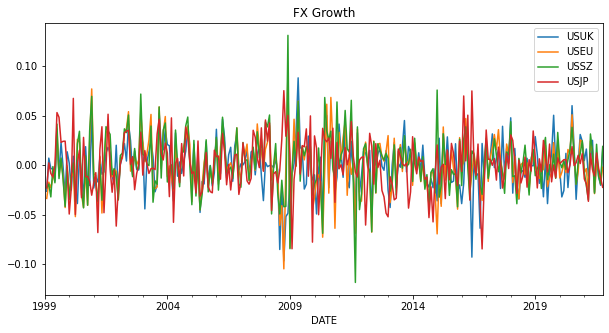

In [14]:
logFXgrowth.plot(title='FX Growth', figsize=(10,5));

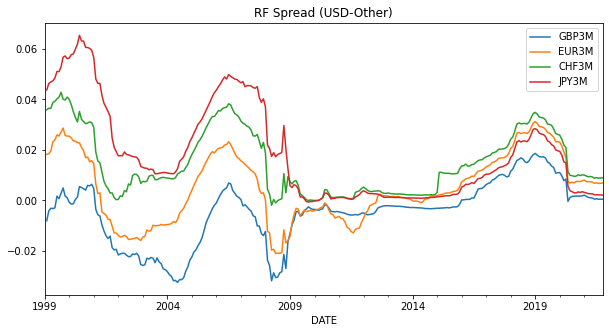

In [15]:
logRFspread.plot(title='RF Spread (USD-Other)', figsize=(10,5));

In [16]:
rx_components = logFXgrowth.mean().to_frame()
rx_components.columns=['FX effect']
rx_components['RF effect'] = -logRFspread.mean().values
rx_components['Total'] = rx_components.sum(axis=1)
rx_components *= 12
rx_components

,FX effect,RF effect,Total
USUK,-0.0081,0.0558,0.0477
USEU,0.0007,-0.0615,-0.0608
USSZ,0.0191,-0.1793,-0.1602
USJP,0.0008,-0.2230,-0.2223


### Performance Metrics

Remember these are log returns, not level returns. But the distinction is minor for the quantitative results here.

In [17]:
performanceMetrics(logRX,annualization=12)

,Mean,Vol,Sharpe,Min,Max
USUK,0.0477,0.0954,0.5001,-0.0938,0.0923
USEU,-0.0608,0.1075,-0.5654,-0.0930,0.1080
USSZ,-0.1602,0.1103,-1.4522,-0.1216,0.1214
USJP,-0.2223,0.1103,-2.0152,-0.1144,0.0677


## 3.2 Implications for UIP

The results above are evidence against UIP, but not strong evidence.
- UIP implies that the mean excess return should be zero. The USD and JPY trade seems to have a mean excess return significantly different from zero.)

- The evidence from the other currencies is not clear. Their mean excess return is not exactly zero, but they are so close to zero that they may not be statistically significant.

- Note that UIP makes no implication about the volatility of these excess returns.

A long position in three of the currencies had negative mean excess (log) returns!
- Being long CHF would have delivered a small positive mean excess log return, but a poor Sharpe.
- The best trade would have been to be short JPY and long USD. This delivered a small but positive mean return and Sharpe.

## 3.3 Predicting FX

Run a forecasting regression for the log FX Growth, as implied by UIP.
- UIP implies that the interest rate spread is the optimal predictor of FX growth.
- Thus, it implies the forecasting beta should be 1.

In [18]:
olstab = pd.DataFrame(index=logFXgrowth.columns, columns=['alpha','Beta','r-squared'])
for i, curncy in enumerate(logFXgrowth.columns):
    temp = get_ols_metrics(logRFspread.iloc[:,i],logFXgrowth.iloc[:,i],annualization=1).drop(columns=['Treynor Ratio','Info Ratio'])
    temp.rename(columns={logRFspread.columns[i]:'Beta'}, inplace=True)
    olstab.loc[curncy,:] = temp.values

olstab.T

,USUK,USEU,USSZ,USJP
alpha,-0.0005,0.0006,0.0039,-0.0006
Beta,0.0319,-0.1127,-0.1521,0.0337
r-squared,0.0002,0.0031,0.0045,0.0006


#### Predicting Appreciation or Depreciation?

Look at whether the betas are positive or negative.

If the regressor (USD minus foreign risk-free rate) goes DOWN, then we expect 
- decreased UK and JP relative to US.
- increased EU and SZ relative to US. (That is, the expected FX growth is higher.)

Thus, if UK risk-free rate increases relative to US risk-free rate, we expect USD will appreciate.
- This means FX growth is partially offsetting the interest-rate differential. But not fully. Beta is positive, but less than one.

For EU and SZ,
- this means that FX growth is exacerbating the returns from the interest rate differentials. Beta is negative, so in a sense, investors expect to gain twice: immediately from the risk-free rate differential, and again from the FX movement at the close of the position.

In fact, the statements above are just about the point estimates, and may not be statistically significant.

#### Strength of Predictability?
These effects are extremely small! The R-squared stats for all four currencies are nearly 0. 

## 3.4 The Dynamic Carry Trade

In [19]:
forecast = pd.DataFrame(columns=logFXgrowth.columns, index=logFXgrowth.index)
for i, curncy in enumerate(logFXgrowth.columns):
    forecast[curncy] = olstab.loc[curncy,'alpha'] + (olstab.loc[curncy,'Beta']-1) * logRFspread.iloc[:,i]

forecast

,USUK,USEU,USSZ,USJP
DATE,,,,
1999-01-31,NaN,NaN,NaN,NaN
1999-02-28,0.0072,-0.0196,-0.0374,-0.0428
1999-03-31,0.0035,-0.0200,-0.0382,-0.0453
1999-04-30,0.0025,-0.0211,-0.0380,-0.0459
1999-05-31,0.0026,-0.0251,-0.0408,-0.0463
...,...,...,...,...
2021-06-30,-0.0010,-0.0069,-0.0062,-0.0027
2021-07-31,-0.0012,-0.0071,-0.0065,-0.0027
2021-08-31,-0.0010,-0.0069,-0.0063,-0.0027


### Forecast timing
We do not need to lag the forecasts with `.shift()` because we already use the lagged calculation of the interest rate spread. 

Thus, the regressor is lagged, and thus is generating forecasts stamped with the date of their targeted value, as desired.

In [20]:
forecast_positive = ((forecast.dropna() > 0).sum() / forecast.dropna().shape[0]).to_frame().T
forecast_positive.index = ['fraction with positive forecastium']
forecast_positive

,USUK,USEU,USSZ,USJP
fraction with positive forecastium,0.641,0.3883,0.2527,0.0037


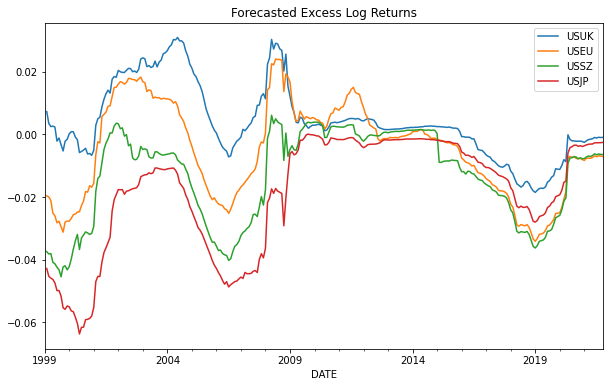

In [21]:
forecast.plot(title='Forecasted Excess Log Returns', figsize=(10,6));

#### Positive or Negative Forecasts?

Though the static carry-trade of section 3.3 found that UK and EU have negative mean excess (log) returns, the dynamic carry trade finds that the time-varying forecast is often positive.

For JP, the forecast is negative throughout the sample due to the much higher interest rate in USD not being offset by appreciation of the Yen to the USD.

#### Improving the Trade?

Just as in HW7, we can use forecasts of excess returns to construct trading positions, (weights,) which vary with the forecasts. The resulting trading strategy should be better than the static carry trade.

That is, we could time the magnitude and direction of the currency trades instead of being passively 100\% invested in a currency according to the evidence in 3.3.

It is analagous to timing the trading of SPY according to the Earnings-Price Ratio instead of being passively 100\% invested in SPY.

Of course, it is an open question as to whether this will work given the weak R-squared in-sample, let alone out-of-sample.

## 3.5 Building the Dynamic Trade

### This is an optional extension. You were not asked to do this in the homework.

Try implementing the forecasts with a simple proportional weighting of each forecast.
Similar to the implementation in HW#7.

In [22]:
passive = logRX
forecast_baseline = logRX.expanding().mean().shift(1)

wts = 100 * forecast
forecast_returns = wts * passive.values
forecast_returns

,USUK,USEU,USSZ,USJP
DATE,,,,
1999-01-31,NaN,NaN,NaN,NaN
1999-02-28,-1.3369e-02,0.1019,0.2198,0.2858
1999-03-31,3.8814e-03,0.0713,0.2124,0.1994
1999-04-30,-8.1541e-05,0.0895,0.2606,0.2540
1999-05-31,-2.0806e-04,0.0923,0.1646,0.2750
...,...,...,...,...
2021-06-30,2.8118e-03,0.0246,0.0231,0.0036
2021-07-31,-8.3325e-04,0.0040,-0.0078,-0.0027
2021-08-31,1.1818e-03,0.0083,0.0124,0.0015


### Check the performance

#### Also compare to the equally-weighted combination of the currency trades

All stats are **much** better than the static carry trade of Section 3.1.
- But this is an in-sample performance.
- Open question whether the OOS version can beat the static table of Section 3.1.

Note that currencies have low means and low vols, so in no case are we expecting to get equity-like return statistics.

In [23]:
forecast_returns['Equally-Weighted'] = forecast_returns.mean(axis=1) * 10

performanceMetrics(forecast_returns,annualization=12)

,Mean,Vol,Sharpe,Min,Max
USUK,0.1843,0.1420,1.2982,-0.1537,0.1932
USEU,0.2957,0.1669,1.7712,-0.1266,0.1975
USSZ,0.4647,0.2475,1.8772,-0.1218,0.3420
USJP,0.7911,0.4294,1.8424,-0.1326,0.6402
Equally-Weighted,4.3393,1.7867,2.4287,-0.9173,2.6748


### How correlated are the active (forecasted) implementations to the passive returns?

- Not all that correlated.
- Note that we're interested in the magnitude, not the sign.
- The active version is shorting JP, so no surprise that the correlation is negative.

In [24]:
corr_tab = forecast_returns.corrwith(passive,drop='missing',axis=0).to_frame().T
corr_tab.index = ['Corr. Passive to Active']
corr_tab

,USUK,USEU,USSZ,USJP
Corr. Passive to Active,0.4629,-0.1479,-0.6763,-0.784
